# EDA for Bank Marketing Dataset

In [1]:
# 1. Imports and Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plotting styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 2. Data Loading
df = pd.read_csv("bank-full.csv", delimiter=";")


In [3]:
# 3. Data Overview
print("Shape:", df.shape)
display(df.head())
df.info()
df.describe(include="all").T


Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [4]:
# 4. Check for Missing Values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [5]:
# 5. Data Types and Unique Values
print("Categorical columns:", df.select_dtypes(include="object").columns.tolist())
print("Numeric columns:", df.select_dtypes(include="number").columns.tolist())
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
y: 2 unique values


# EDA WITH VISUALISATIONS

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


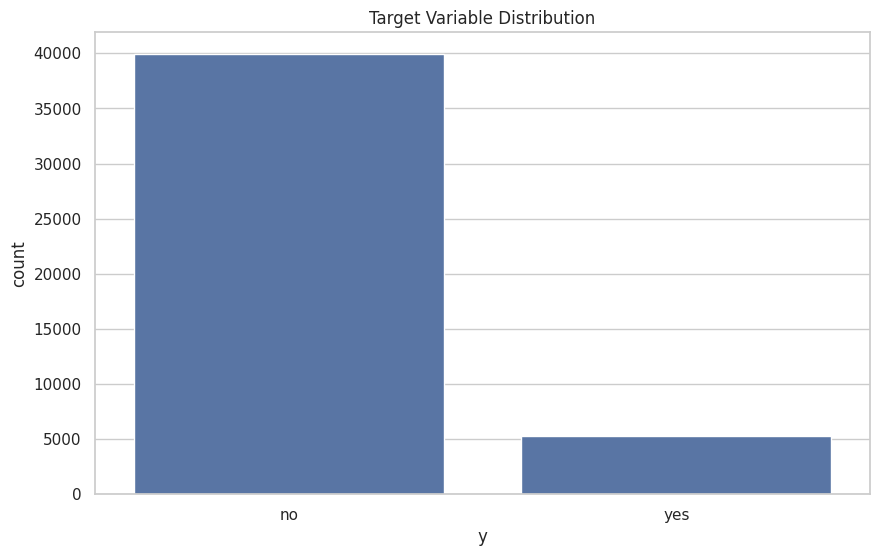

In [6]:
# 6. Target Variable Analysis
print(df["y"].value_counts(normalize=True))
sns.countplot(x="y", data=df)
plt.title("Target Variable Distribution")
plt.show()


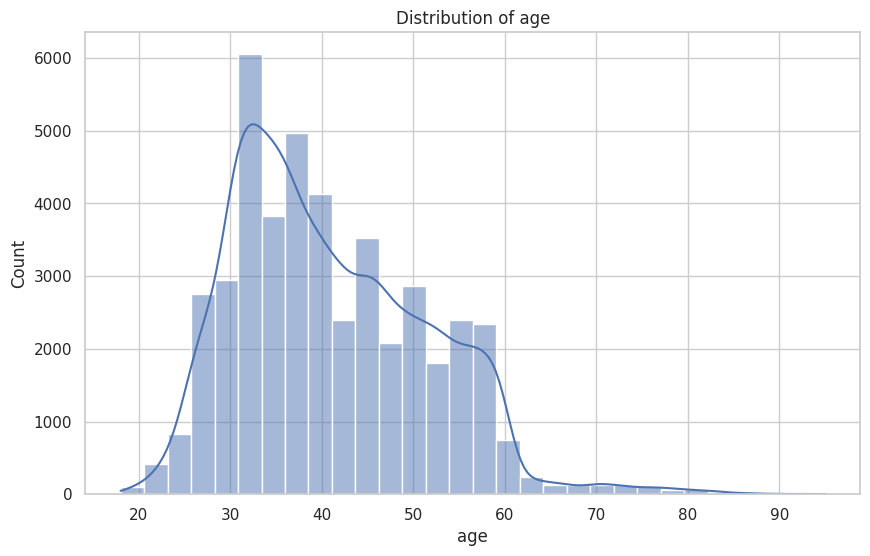

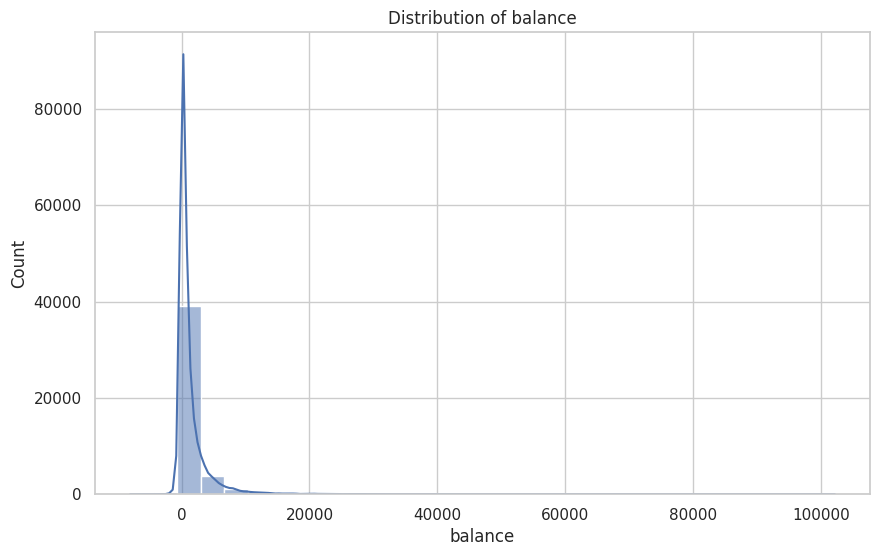

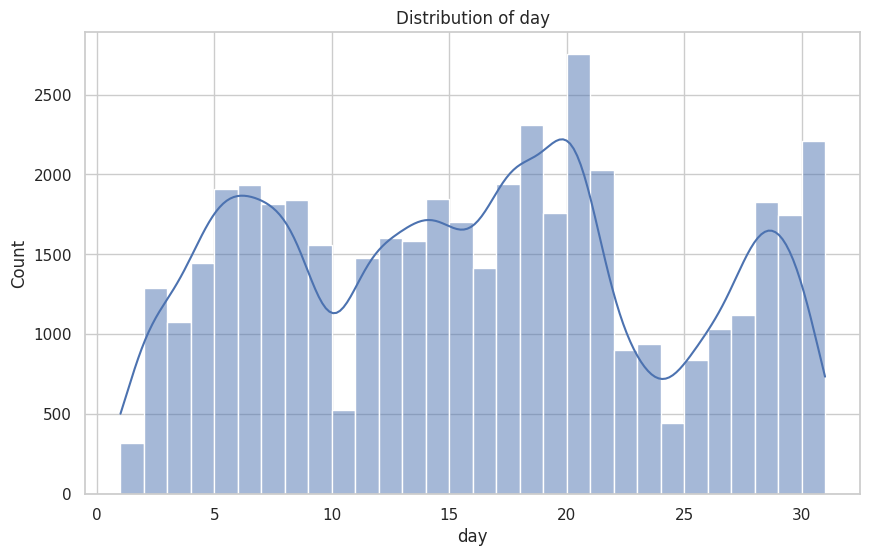

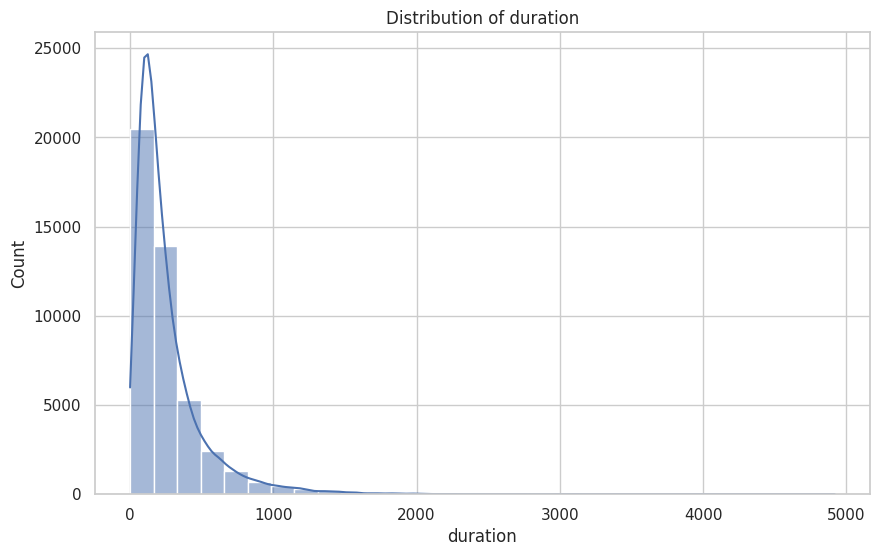

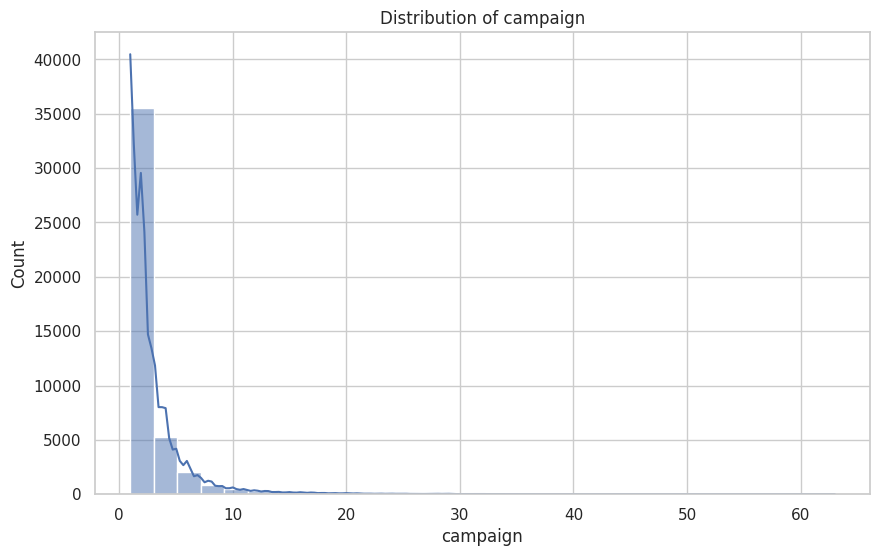

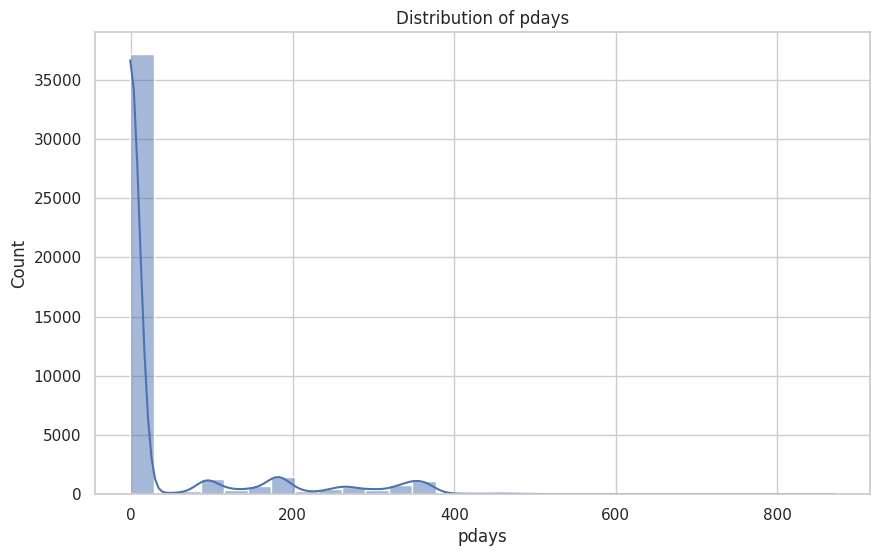

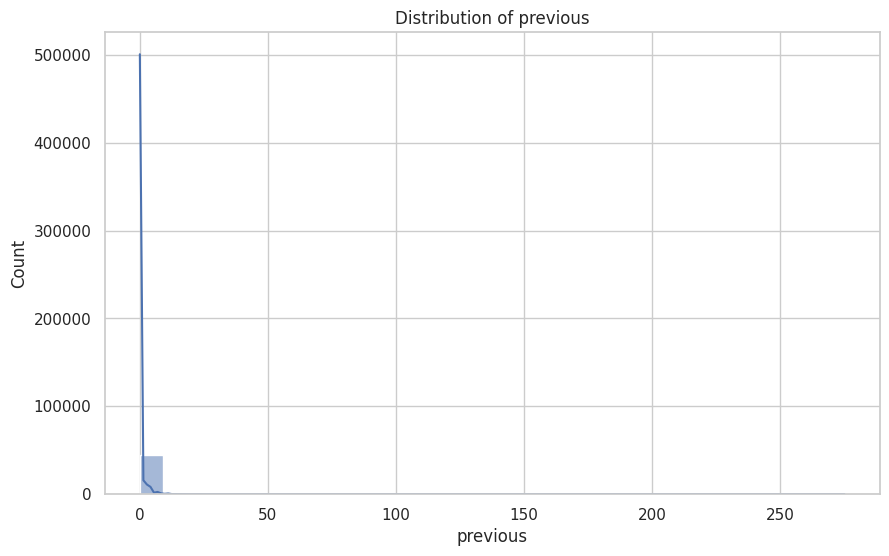

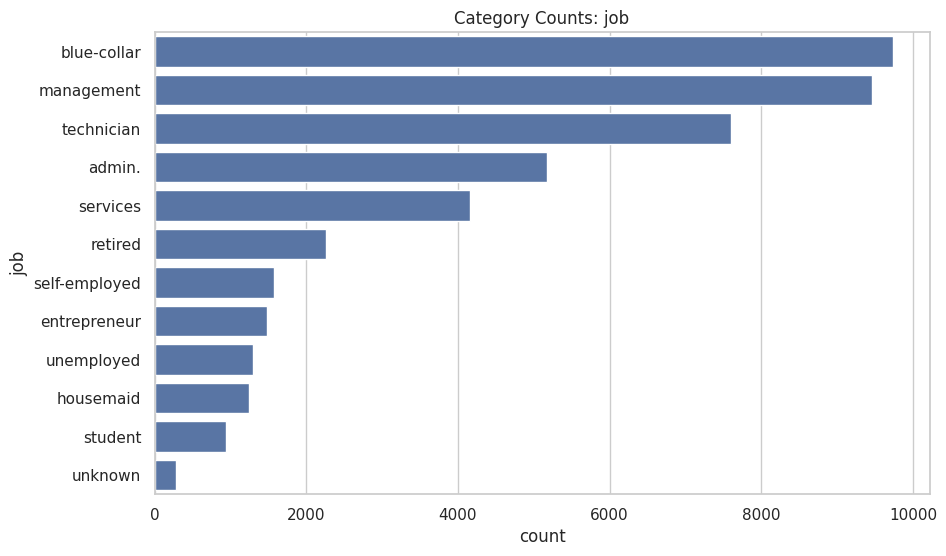

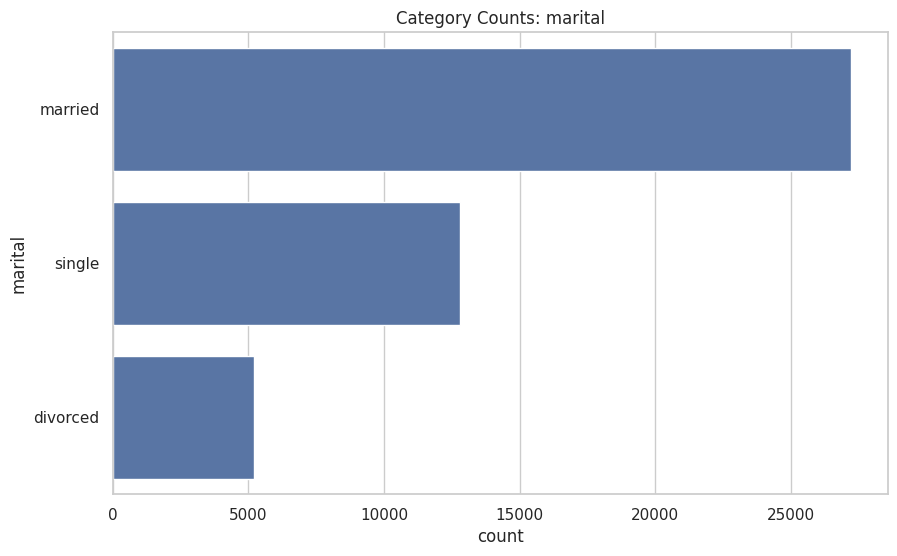

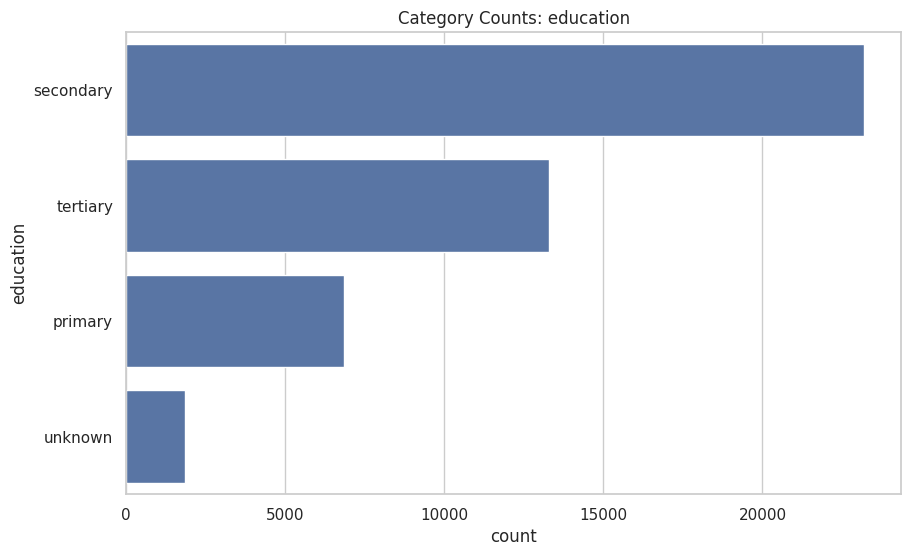

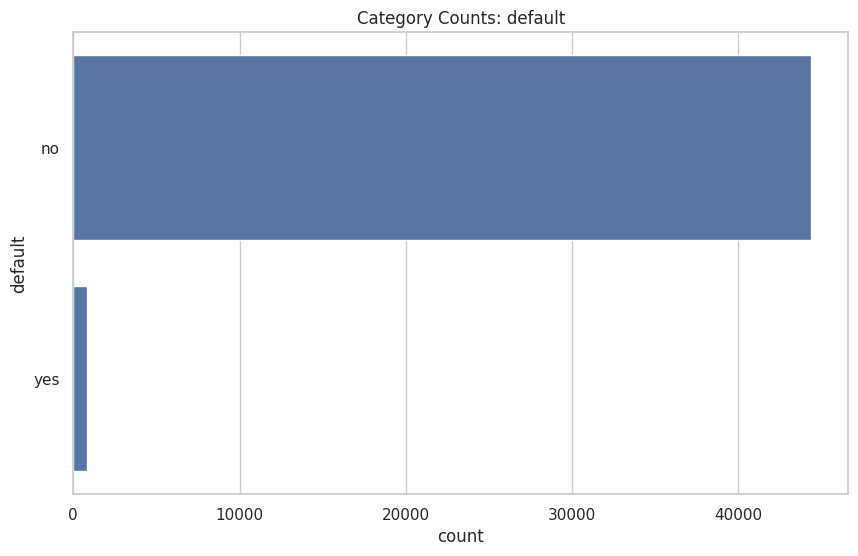

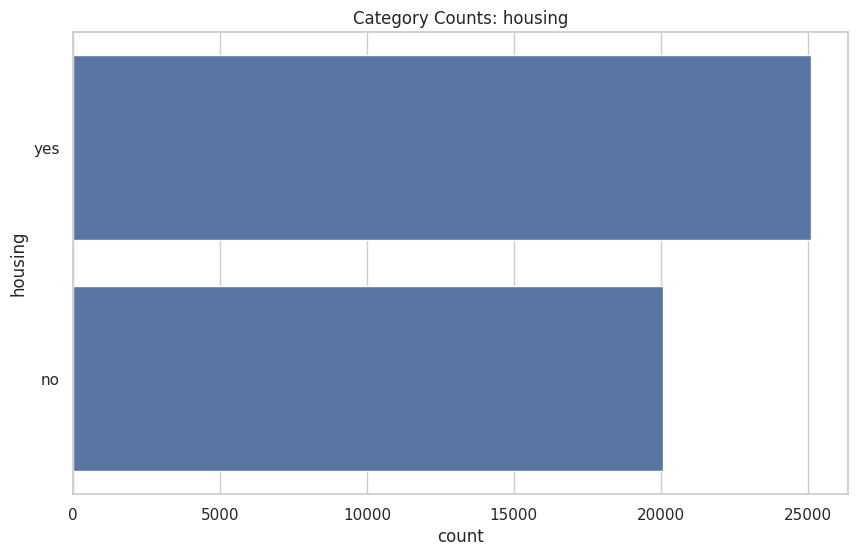

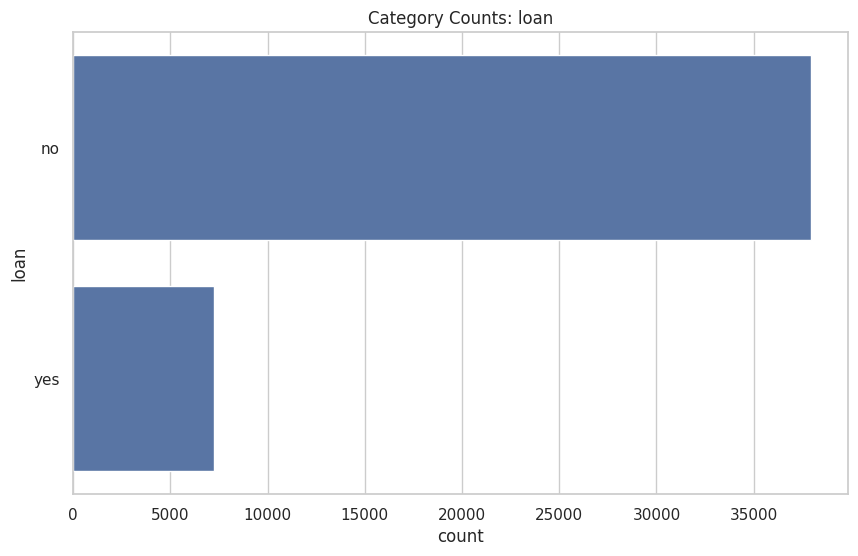

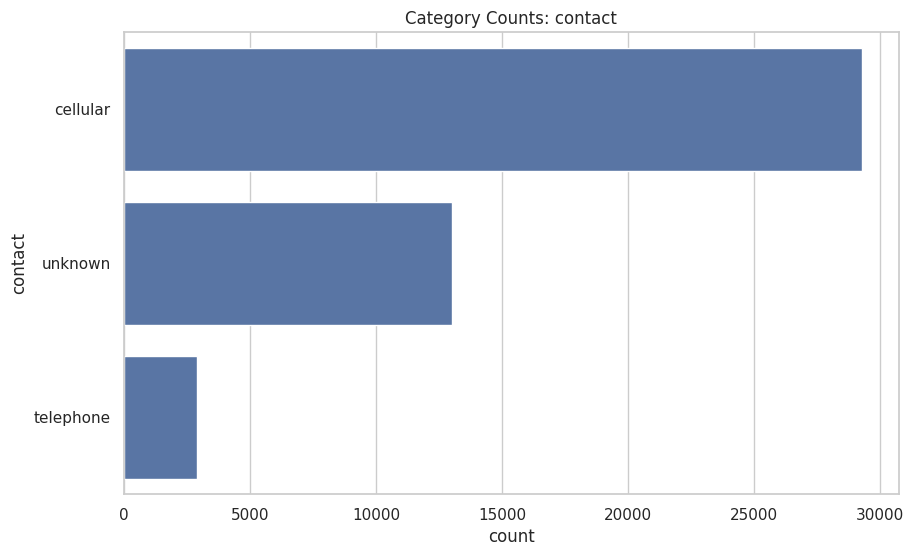

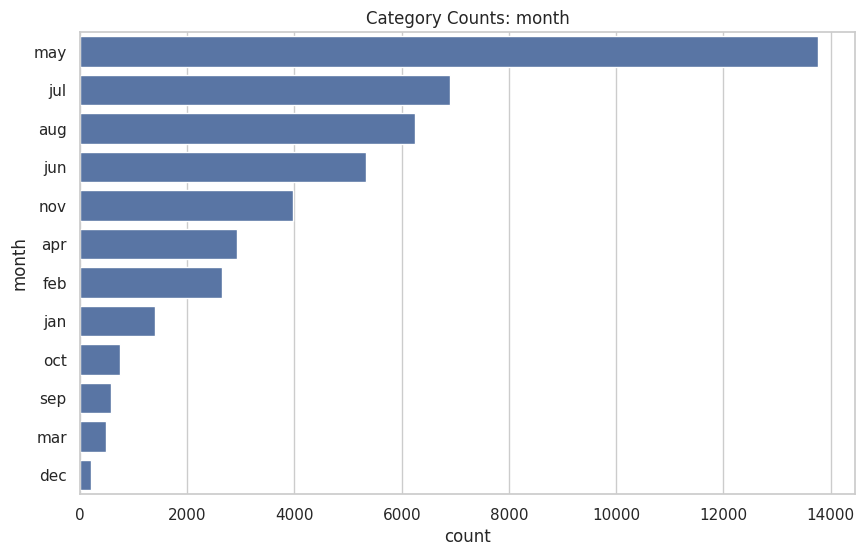

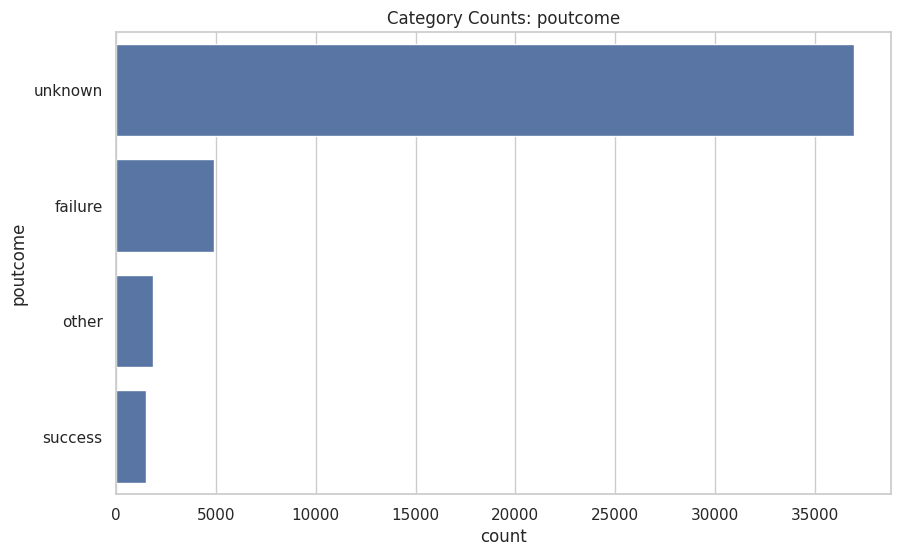

In [7]:
# 7. Univariate Analysis
for col in df.select_dtypes(include="number").columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

for col in df.select_dtypes(include="object").columns:
    if col != "y":
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Category Counts: {col}")
        plt.show()


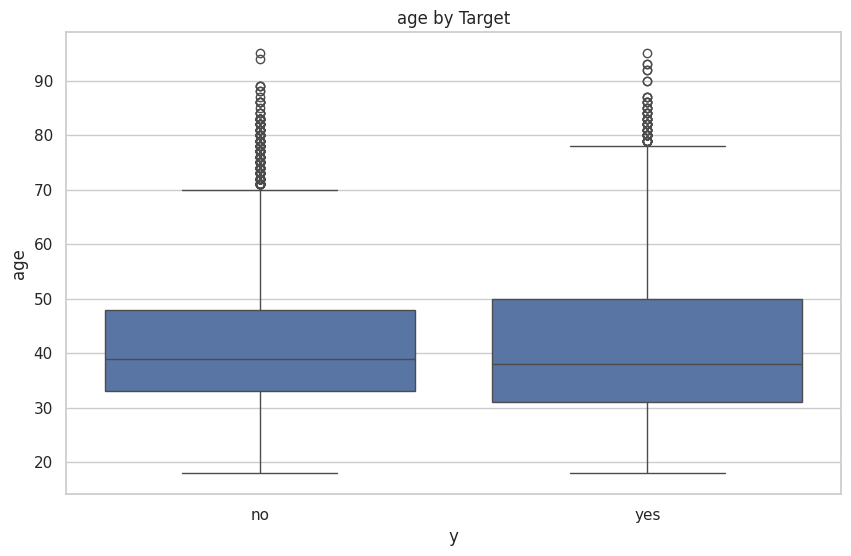

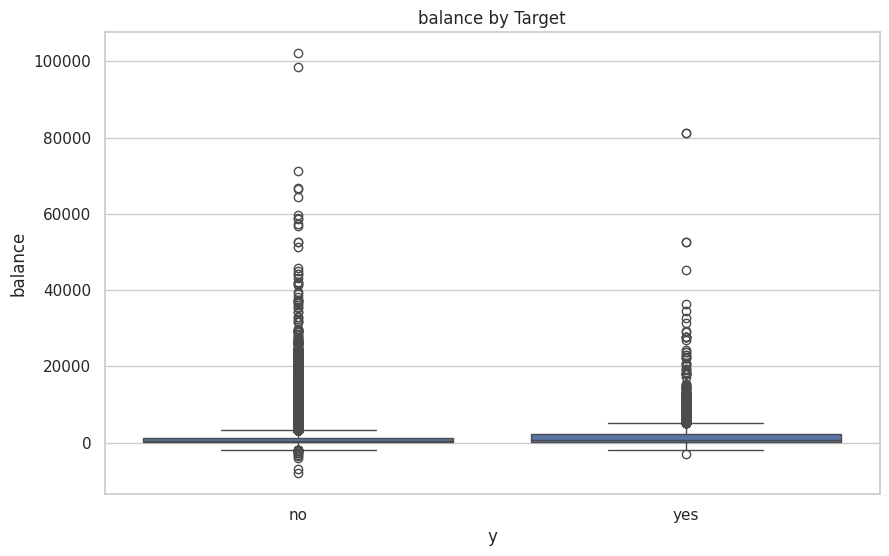

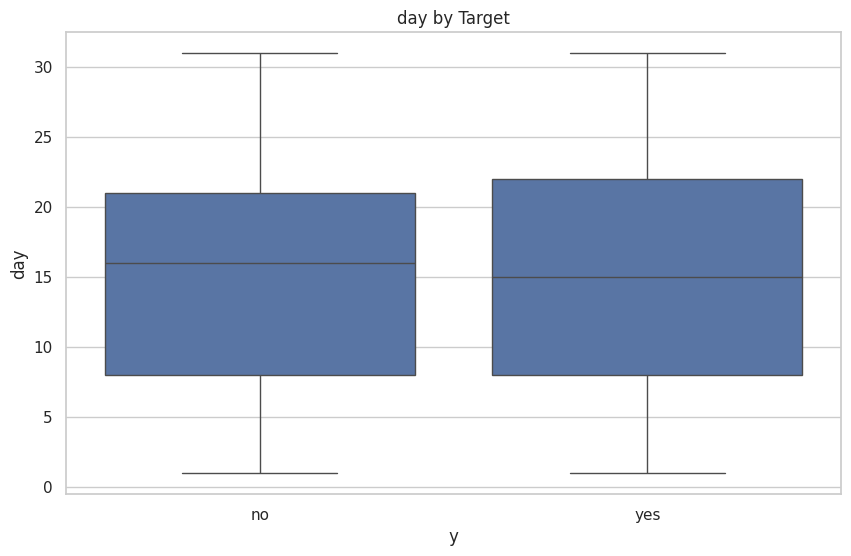

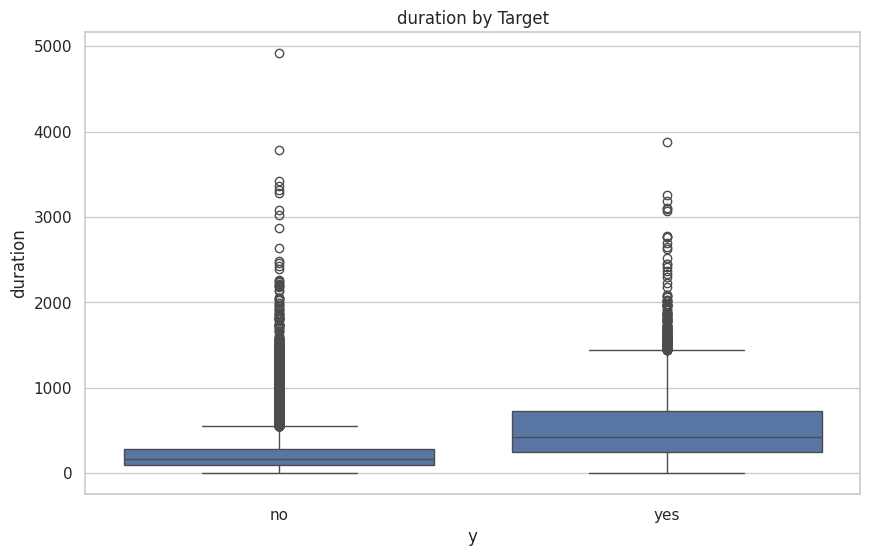

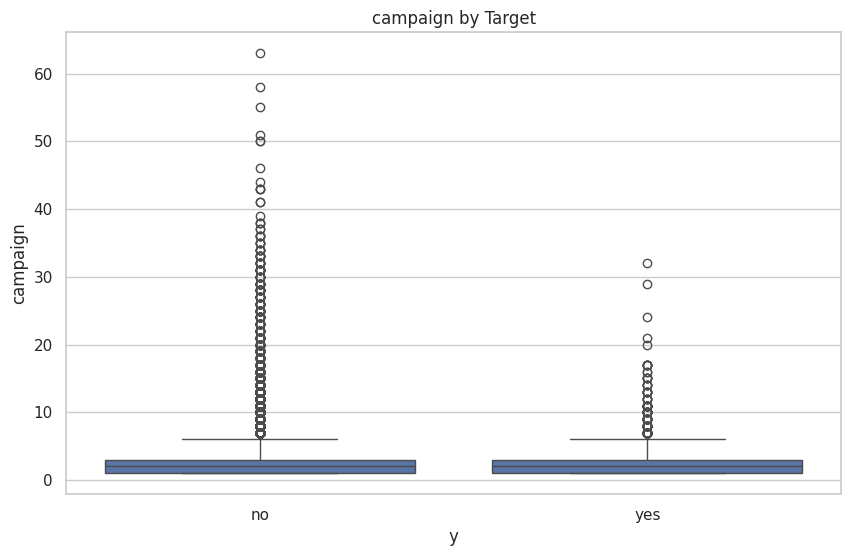

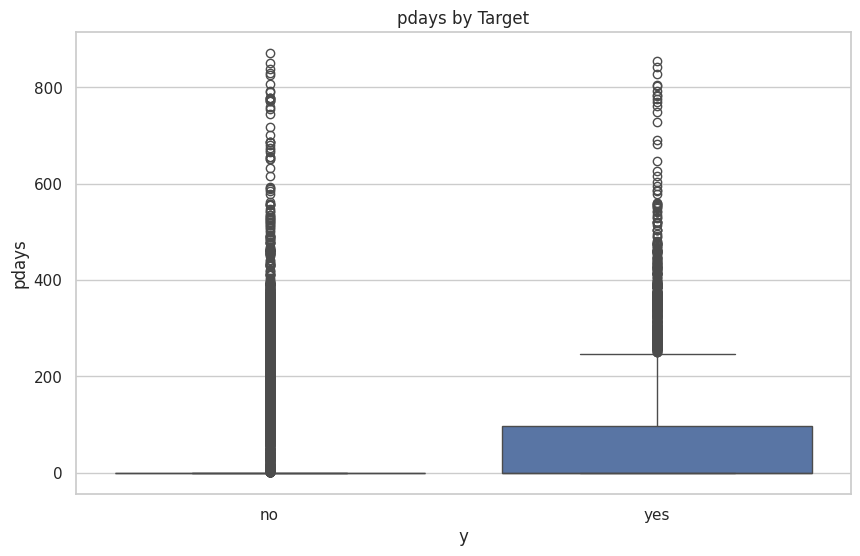

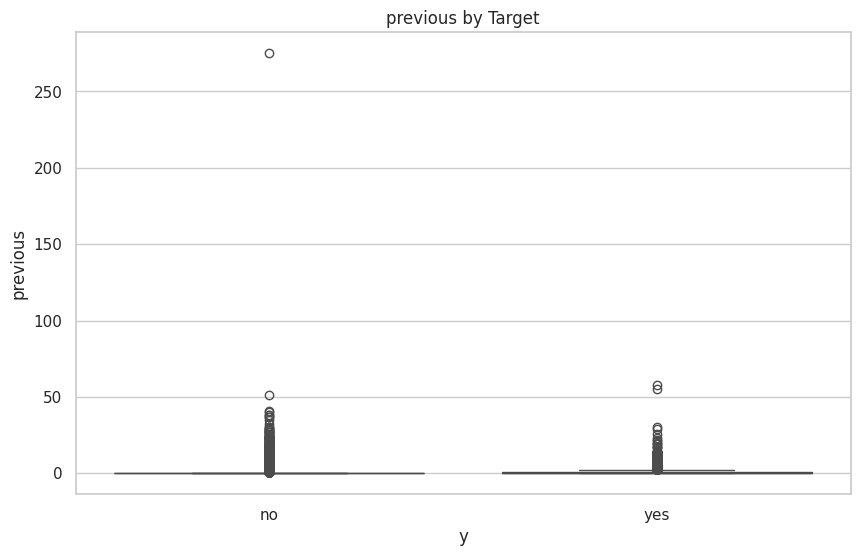

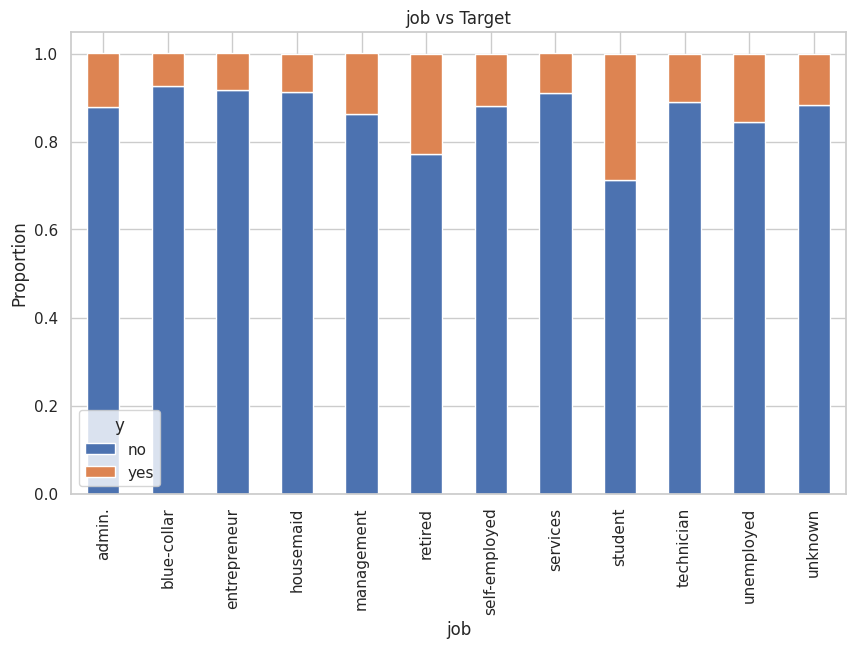

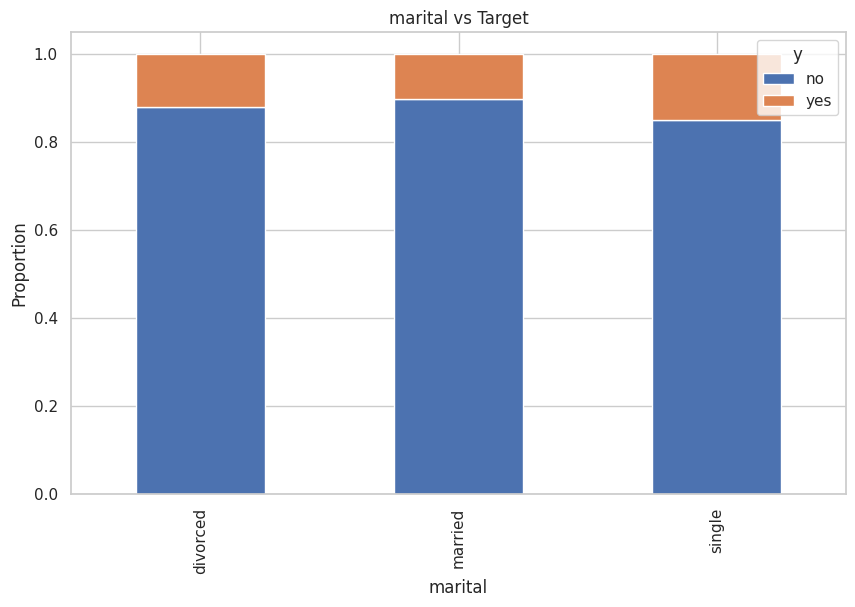

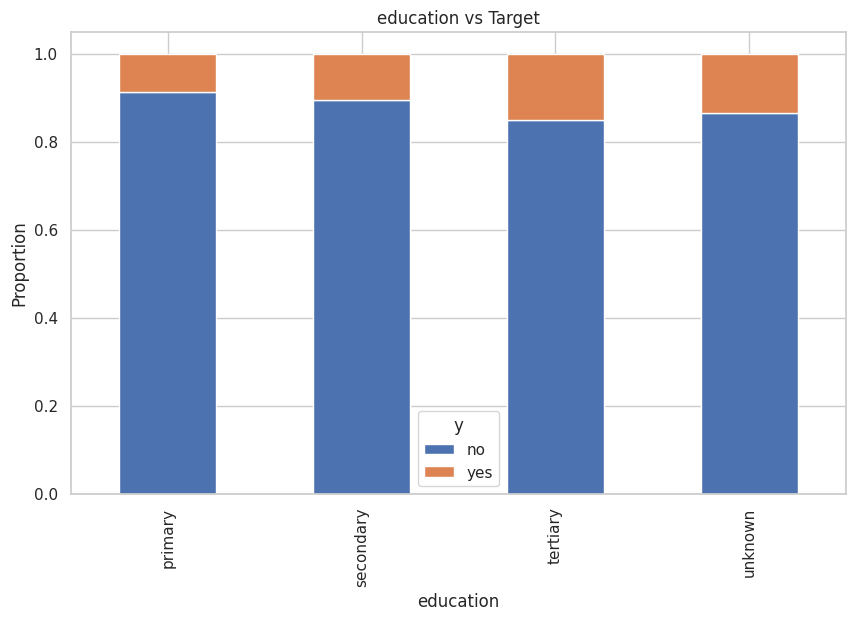

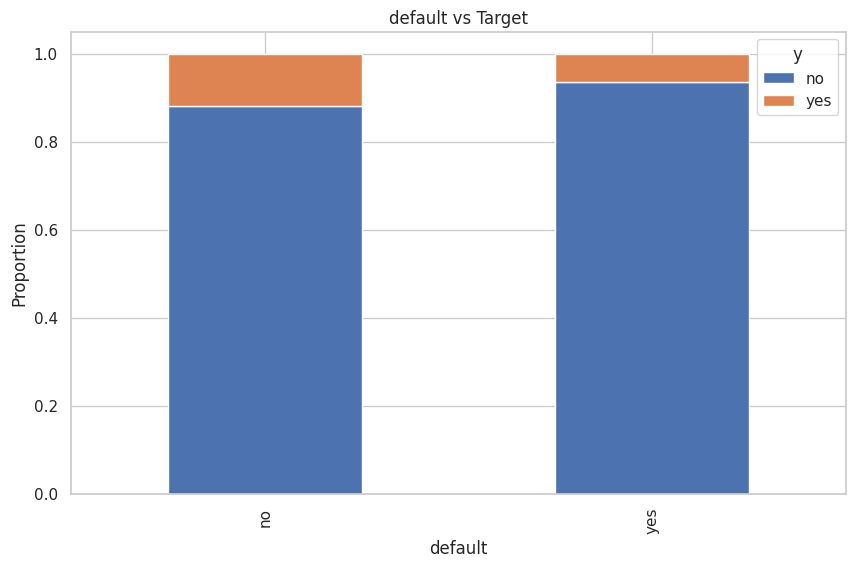

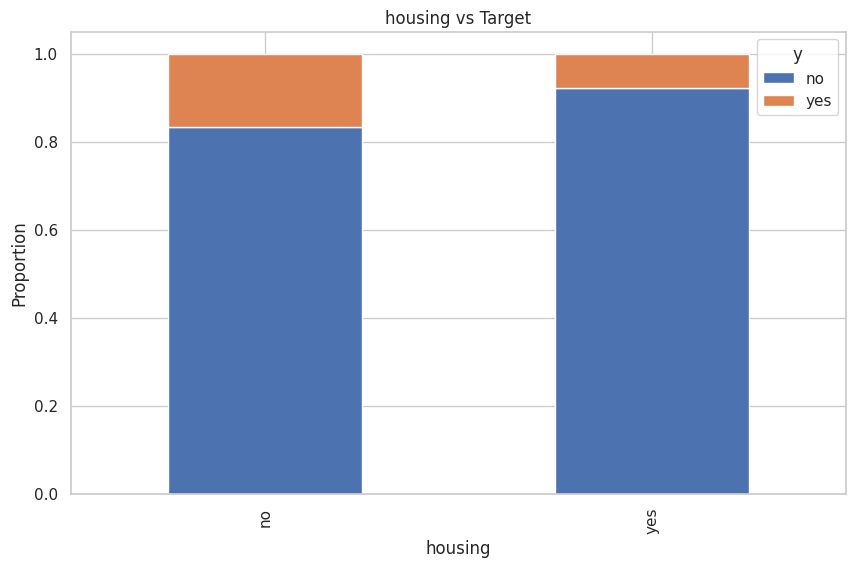

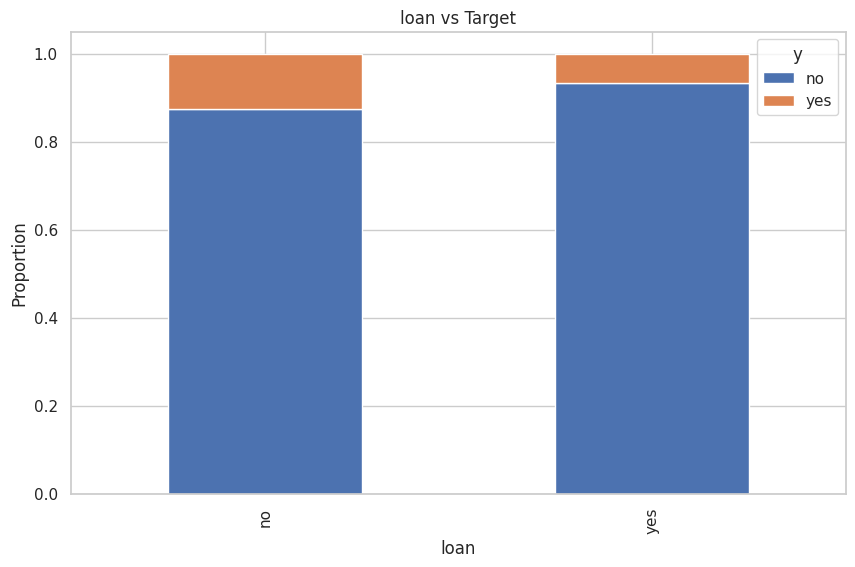

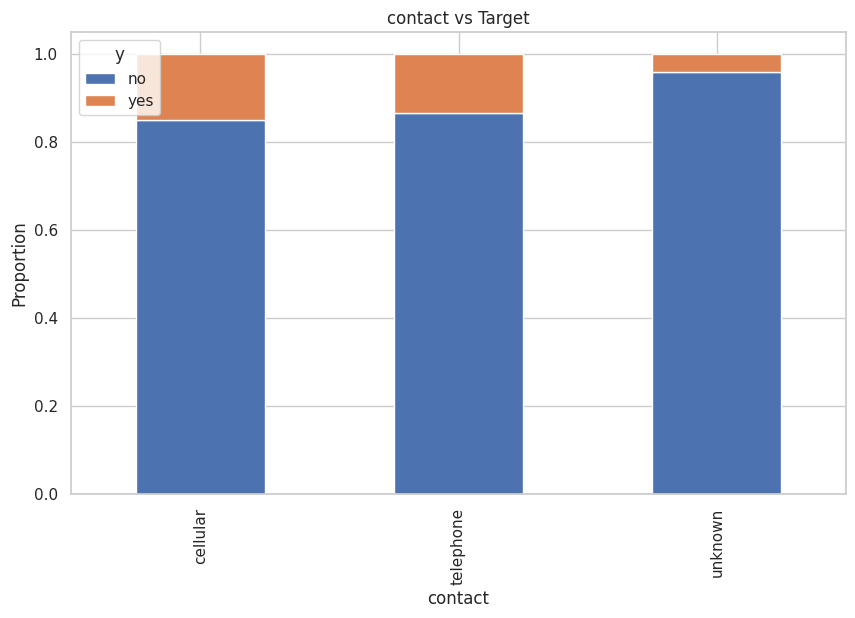

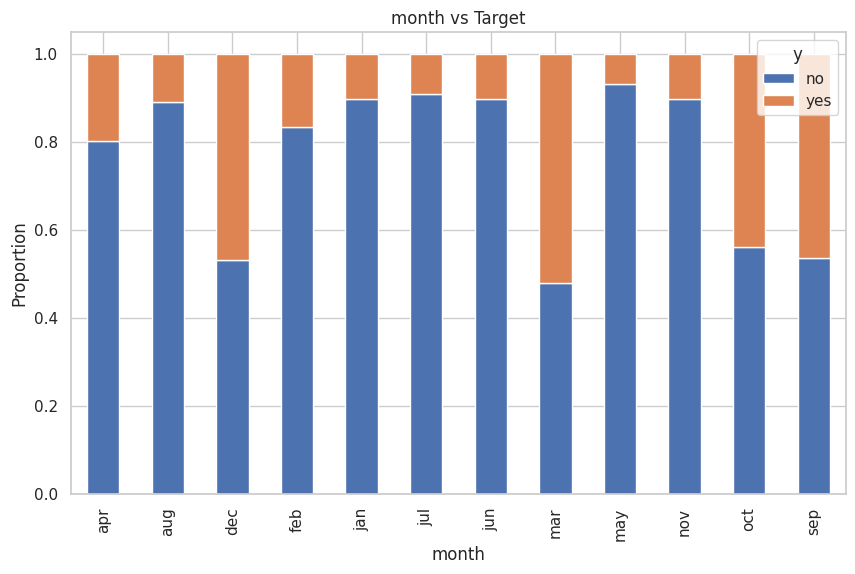

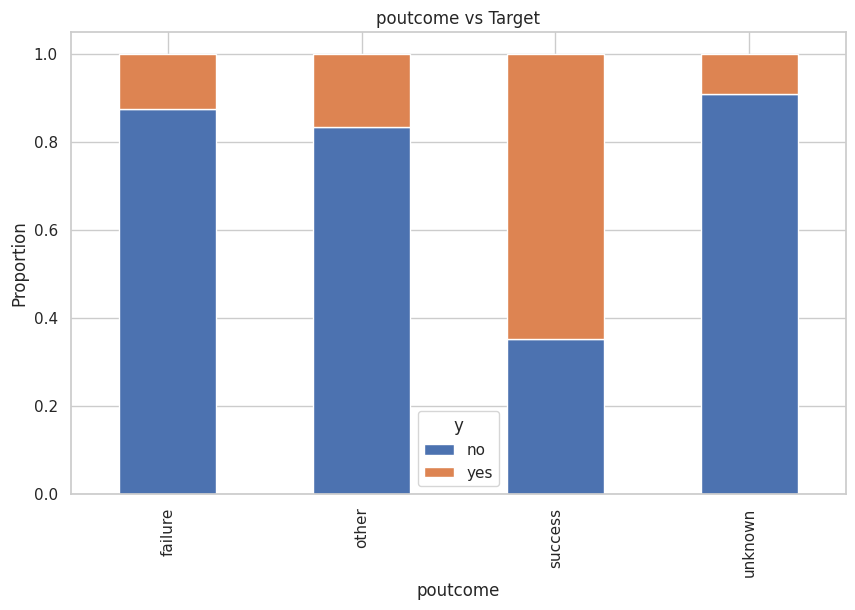

In [8]:
# 8. Bivariate Analysis
# Numeric vs Target
for col in df.select_dtypes(include="number").columns:
    sns.boxplot(x="y", y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()

# Categorical vs Target
for col in df.select_dtypes(include="object").columns:
    if col != "y":
        ct = pd.crosstab(df[col], df["y"], normalize="index")
        ct.plot(kind="bar", stacked=True)
        plt.title(f"{col} vs Target")
        plt.ylabel("Proportion")
        plt.show()


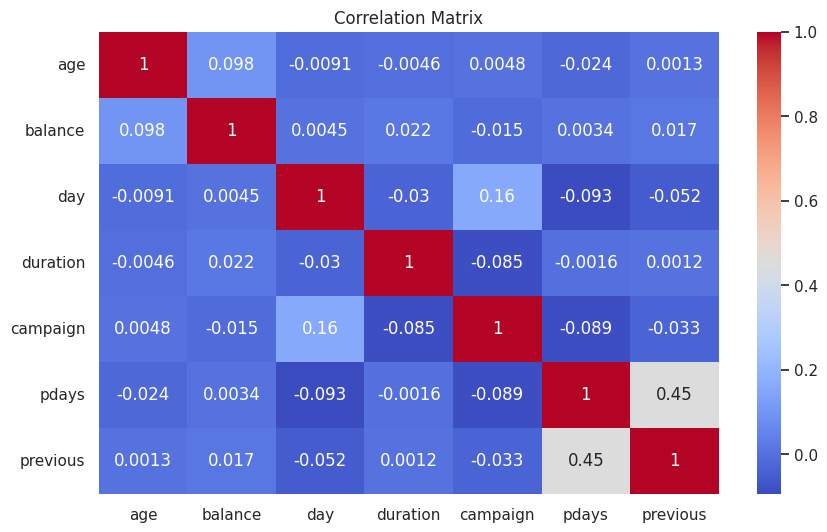

In [9]:
# 9. Correlation Analysis
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


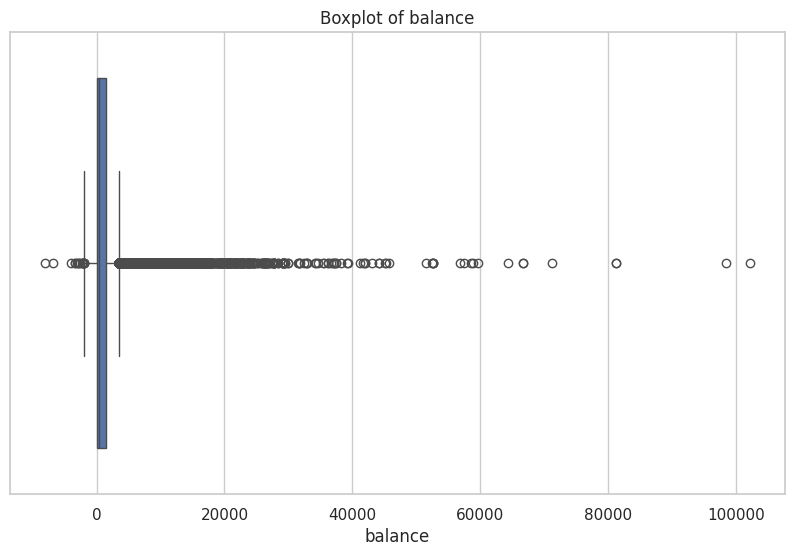

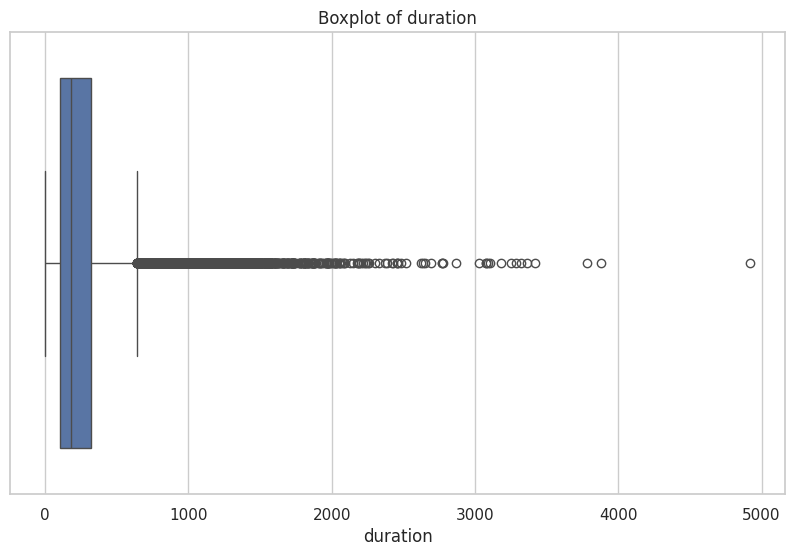

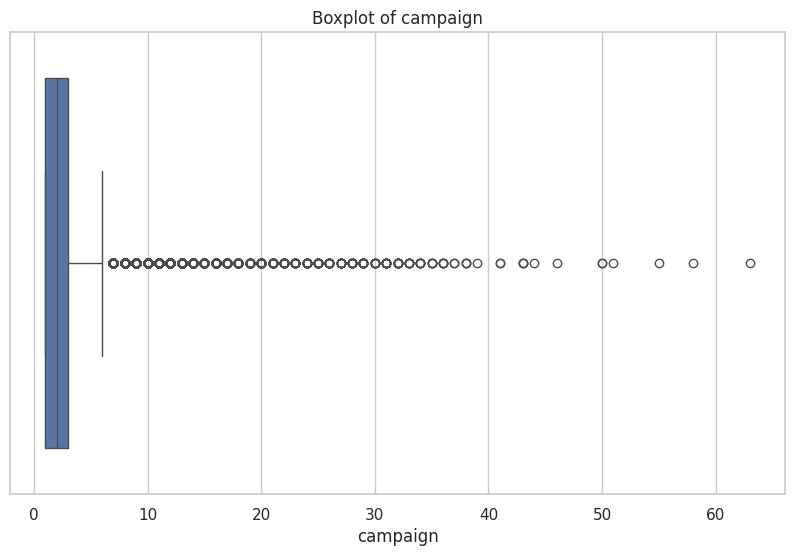

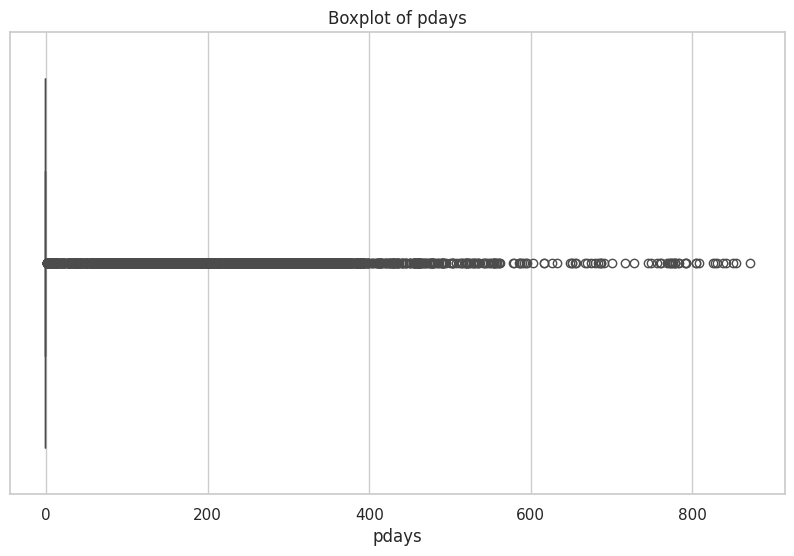

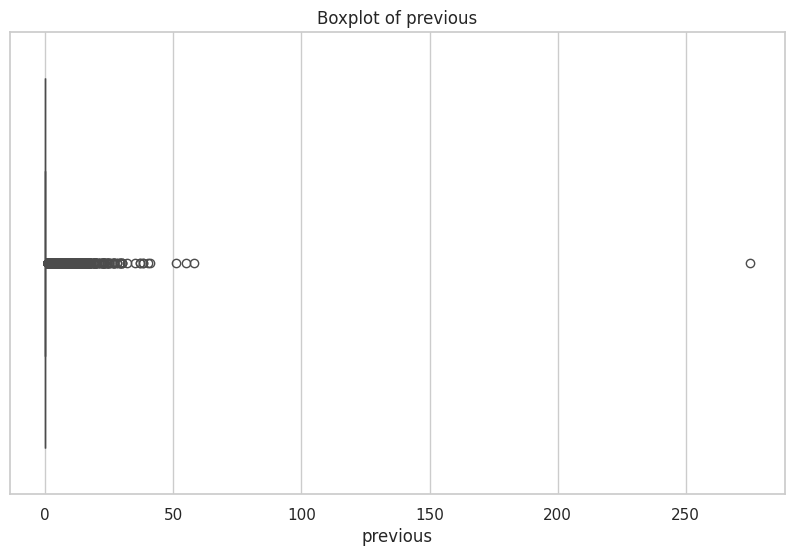

In [10]:
# 10. Outlier Detection
for col in ["balance", "duration", "campaign", "pdays", "previous"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [11]:
# 11. Special Feature Considerations
# Duration is known to cause target leakage; flag it for exclusion in modeling
print("Note: 'duration' should not be used as a predictor to avoid target leakage.")


Note: 'duration' should not be used as a predictor to avoid target leakage.


In [12]:
# 12. Class Imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f"Class distribution: {Counter(df['y'])}")
# (Optional) Example of how to balance classes with SMOTE:
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(df.drop('y', axis=1), df['y'])


Class distribution: Counter({'no': 39922, 'yes': 5289})


In [13]:
# 13. Encoding Categorical Variables (for modeling)
# Example: One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (45211, 43)


#Preprocessing Recommendations
1. Handle Target Leakage

Remove duration column: This feature is only known after the outcome and introduces data leakage.

2. Encode Categorical Variables

One-hot encoding for nominal features:

python
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default',
                                       'housing', 'loan', 'contact', 'month', 'poutcome'],
                          drop_first=True)
Ordinal encoding (if applicable) for education levels.

3. Address Class Imbalance

Use SMOTE for oversampling:

python
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
Consider class weights in models like Logistic Regression.

4. Handle Numeric Features

Scale features using StandardScaler:

python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
Treat outliers in balance using log transformation or capping.

5. Feature Engineering

Create binary indicator for pdays=-1 (never contacted).

Engineer contact frequency from previous and campaign.

6. Temporal Features

Convert month to numerical representation (1-12).

Consider cyclical encoding for day and month
